In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import os

In [3]:
data = pd.read_csv('StudentsPerformance.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# 데이터 앞 부분 확인
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# 데이터 뒷 부분 확인
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [8]:
# 랜덤 데이터 확인
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
403,female,group D,high school,standard,completed,88,99,100
813,male,group E,some high school,standard,completed,87,84,76
454,female,group C,associate's degree,free/reduced,none,53,61,62
722,female,group B,some high school,free/reduced,completed,74,90,88
644,male,group B,high school,standard,none,70,65,60


In [9]:
#랜덤데이터 -> 비율중심 : 1000개의 10% -> 100개
data.sample(frac=0.1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
6,female,group B,some college,standard,completed,88,95,92
653,female,group A,associate's degree,standard,completed,65,70,74
737,female,group B,some college,free/reduced,completed,53,66,73
969,female,group B,bachelor's degree,standard,none,75,84,80
707,male,group C,some college,standard,none,66,59,52
...,...,...,...,...,...,...,...,...
379,male,group A,bachelor's degree,standard,none,66,64,62
772,female,group B,some high school,free/reduced,completed,52,67,72
158,female,group B,associate's degree,standard,completed,61,86,87
428,male,group A,some high school,free/reduced,none,65,59,53


In [10]:
# 기본적인 수치정보를 확인 (모든 컬럼이 아닌 수치부분만)
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
# 각 컬럼의 type 확인
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [12]:
# 상관계수 측정
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [15]:
data.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [21]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [22]:
data.isnull().sum().sum()

0

In [17]:
# 빵구난 데이터가 있는지 확인
# m1)
data.isnull().values.any()

False

In [23]:
# 컬럼명 변경
data.rename(columns=({'gender':'Gender',
                      'race/ethnicity':'Race/Ethnicity',
                      'parental level of education':'Parental_Level_of_Education'
                    ,'lunch':'Lunch','test preparation course':'Test_Preparation_Course'
                      ,'math score':'Math_Score','reading score':'Reading_Score'
                     ,'writing score':'Writing_Score'}),inplace=True)

In [25]:
data["Gender"].value_counts()

female    518
male      482
Name: Gender, dtype: int64

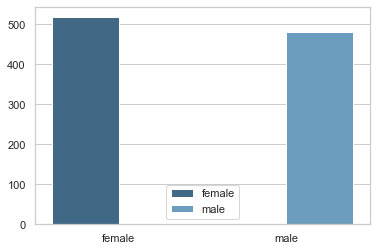

In [30]:
# 성별에 대한 barplot 그려보기
sns.set(style = 'whitegrid')

# 정확하게 x, y에 대한 값을 지정하면서 그리는 스타일 :
ax = sns.barplot(x = data['Gender'].value_counts().index, # ["female", "male"]
                 y = data['Gender'].value_counts().values, # [300, 700]
                 palette = "Blues_d",
                hue = ['female', 'male'])

# 기타옵션
plt.legend(loc = 8)
                                                                                                ############# 수정필요 #############

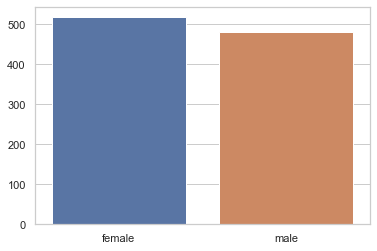

In [27]:
#핵심파트
ax = sns.barplot(x = data['Gender'].value_counts().index,
                 y = data['Gender'].value_counts().values)

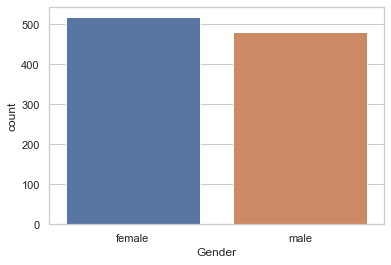

In [28]:
# 위와 동일한 스타일
sns.countplot(data = data, x = "Gender")

In [31]:
# 인종구별로 barplot 그려보기
data['Race/Ethnicity'].value_counts

<bound method IndexOpsMixin.value_counts of 0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: Race/Ethnicity, Length: 1000, dtype: object>

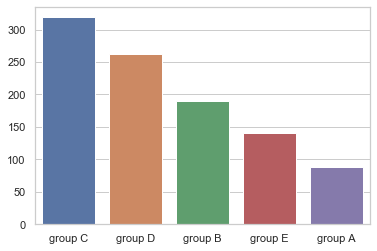

In [32]:
sns.barplot(x = data['Race/Ethnicity'].value_counts().index,
                 y = data['Race/Ethnicity'].value_counts().values)
                                                                                            ############# 수정필요 #############

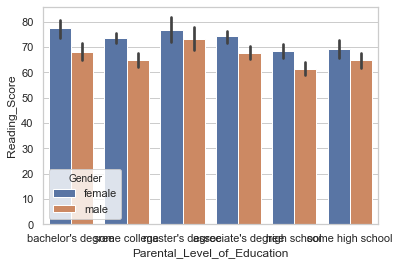

In [36]:
sns.barplot(data=data,
            x = "Parental_Level_of_Education",
            y = "Writing_Score",
            hue = "Gender"
)
                                                                                            ############# 수정필요 #############

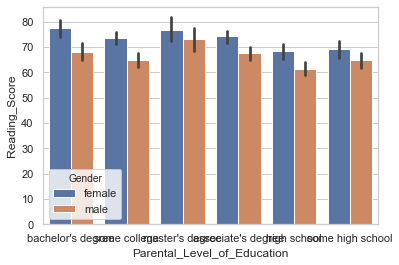

In [37]:
sns.barplot(data=data,
            x = "Parental_Level_of_Education",
            y = "Reading_Score",
            hue = "Gender"
)

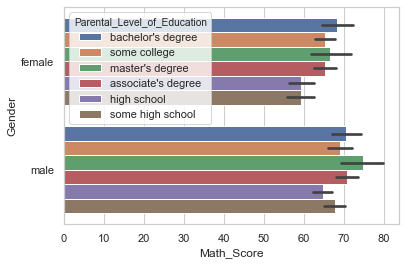

In [38]:
sns.barplot(data=data,
            x = "Math_Score",
            y = "Gender",
            hue = "Parental_Level_of_Education"
)

In [39]:
# 01) 기본적인 Test_Preparation_Course 값들 확인
data['Test_Preparation_Course'].value_counts()

none         642
completed    358
Name: Test_Preparation_Course, dtype: int64

In [ ]:
#주어진 조건의 데이터 추리기

data_lunch_score = data[data]

                                                                                            ############# 수정필요 #############